In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
notebook_dir= os.getcwd()
sys.path.append(os.path.join(notebook_dir, '..', 'scripts'))
from news import news_

In [5]:
file= '../Data/raw_analyst_ratings.csv/raw_analyst_ratings (Autosaved).csv'
df= news_.load_data(file)
df

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,6/5/2020,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,6/3/2020,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,5/26/2020,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,5/22/2020,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,5/22/2020,A
...,...,...,...,...,...,...
1048570,1053768,First Horizon National to Replace QLogic in S&...,https://www.benzinga.com/news/13/06/3678254/fi...,Paul Quintaro,6/14/2013,QLGC
1048571,1053769,"UPDATE: QLogic Announces Restructuring Plan, t...",https://www.benzinga.com/news/13/06/3645866/up...,Paul Quintaro,6/4/2013,QLGC
1048572,1053770,"QLogic Announces Restructuring Plan, to Cut Jo...",https://www.benzinga.com/news/13/06/3645825/ql...,Paul Quintaro,6/4/2013,QLGC
1048573,1053771,QLogic Corporation Reports Q4 EPS of $0.17 vs ...,https://www.benzinga.com/news/earnings/13/05/3...,Paul Quintaro,5/2/2013,QLGC


In [60]:
# Calculate the length of each headline and getting stats about the column
headline_stats = df['headline'].describe()
print(headline_stats)
df['headline_length'] = df['headline'].str.len()
print(df.shape)


count                     1407328
unique                     845770
top       Benzinga's Top Upgrades
freq                         5449
Name: headline, dtype: object
(1407328, 11)


In [6]:
#calculating the how many articles have the pulisherd published and storing the count in article count
article_per_publisher= df.groupby('publisher').size().reset_index(name='article count')
article_per_publisher = article_per_publisher.sort_values(by='article count', ascending=False)
article_per_publisher

,publisher,article count
653,Paul Quintaro,168435
507,Lisa Levin,139785
92,Benzinga Newsdesk,111281
162,Charles Gross,72892
590,Monica Gerson,61374
...,...,...
497,Laura Jennings,1
453,Joshua Rodriguez,1
455,Jr Deputy Accountant,1
926,gmaxxx,1


In [17]:
#calculating the how many articles have the published about a single company throught the years 
article_per_stock= df.groupby('stock').size().reset_index(name='stock count')
articles_per_stock = article_per_stock.sort_values(by='stock count', ascending=False)
articles_per_stock

,stock,stock count
3699,MRK,3333
3707,MS,3238
4004,NVDA,3146
3752,MU,3142
4597,QQQ,3106
...,...,...
1588,DWM,1
1586,DWAT,1
1580,DVP,1
1601,DXJS,1


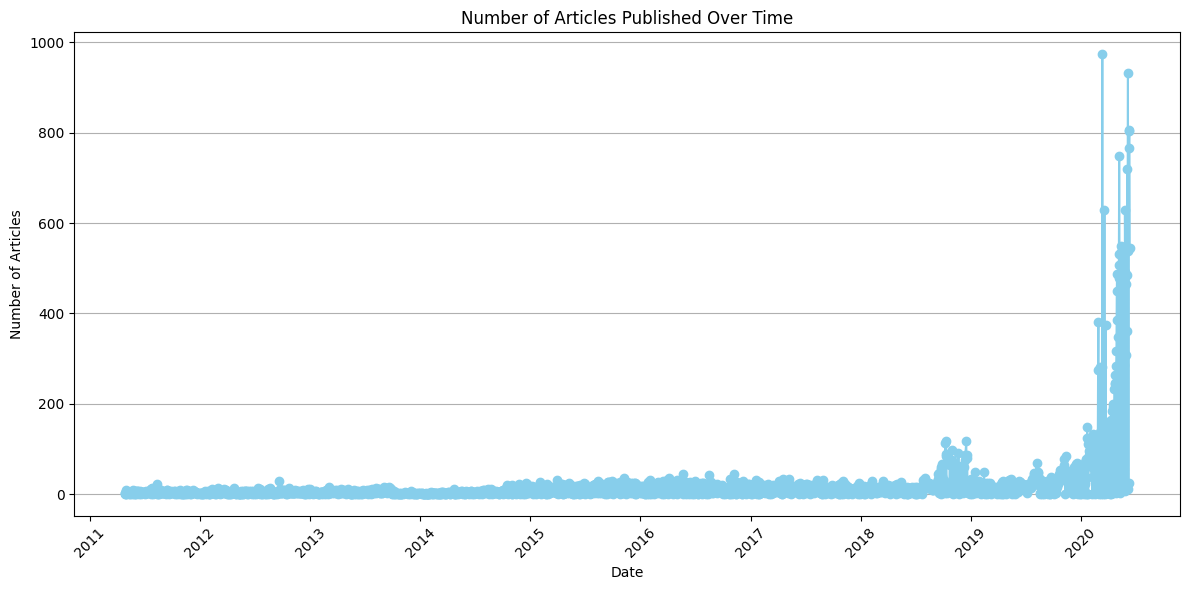

In [3]:
# This displays Number of articles published over time

AOT=news_.plot_article_over_time(df)
AOT

In [7]:
#This displays if the headline is positve, negative or neutral you can see the result if you slide to the right

sentiment= news_.sentiment_analysis(df)
sentiment

,Unnamed: 0,headline,url,publisher,date,stock,score,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,6/5/2020,A,0.000000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,6/3/2020,A,0.000000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,5/26/2020,A,0.000000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,5/22/2020,A,0.000000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,5/22/2020,A,0.000000,Neutral
...,...,...,...,...,...,...,...,...
1048570,1053768,First Horizon National to Replace QLogic in S&...,https://www.benzinga.com/news/13/06/3678254/fi...,Paul Quintaro,6/14/2013,QLGC,0.250000,Positive
1048571,1053769,"UPDATE: QLogic Announces Restructuring Plan, t...",https://www.benzinga.com/news/13/06/3645866/up...,Paul Quintaro,6/4/2013,QLGC,0.000000,Neutral
1048572,1053770,"QLogic Announces Restructuring Plan, to Cut Jo...",https://www.benzinga.com/news/13/06/3645825/ql...,Paul Quintaro,6/4/2013,QLGC,0.000000,Neutral
1048573,1053771,QLogic Corporation Reports Q4 EPS of $0.17 vs ...,https://www.benzinga.com/news/earnings/13/05/3...,Paul Quintaro,5/2/2013,QLGC,0.000000,Neutral


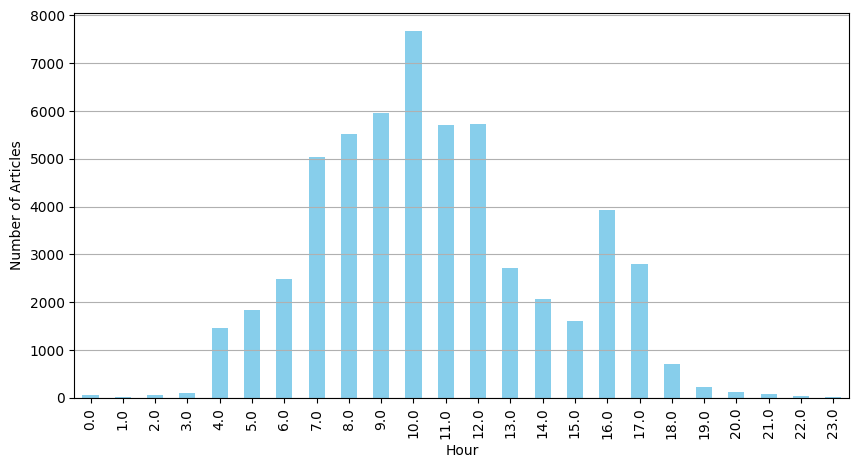

In [59]:

# importing from plots to show number of article every hour
from plots import plot_article_by_hour
plot_article_by_hour(df)

In [43]:
# Shows Publisher with the highest number of publishes and classify there headlines using NLP
publish= news_.con(df)
publish

c:\Users\hello\Desktop\git\Stock-market-data-analysis-and-prediction\notebooks\..\scripts\Publisher_analysis.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['score'] = filtered_df['headline'].apply(lambda headline: sid.polarity_scores(headline)['compound'])
c:\Users\hello\Desktop\git\Stock-market-data-analysis-and-prediction\notebooks\..\scripts\Publisher_analysis.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['score'].apply(lambda score: 'Positi

sentiment,Negative,Neutral,Positive
publisher,,,
Benzinga Newsdesk,38668,60844,50972
Lisa Levin,31309,108573,47097
Paul Quintaro,25695,131319,71359


In [48]:
# Displays companies with the most publish
unique_domains = news_.count_unique_domains(df)
unique_domains

{'benzinga.com': 7937,
 'gmail.com': 139,
 'andyswan.com': 5,
 'investdiva.com': 2,
 'eosdetroit.io': 1,
 'tothetick.com': 2,
 'forextraininggroup.com': 1,
 'stockmetrix.net': 1}